## Importing Libraries

In [1]:
# Instalar bibliotecas pendentes
%pip install pandas numpy matplotlib seaborn scikit-learn tensorflow scikeras

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # type: ignore
from tensorflow.keras.models import Sequential  # type: ignore
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout  # type: ignore
from scikeras.wrappers import KerasClassifier # type: ignore
from tensorflow.keras.callbacks import EarlyStopping  # type: ignore
import keras_tuner as kt
from tensorflow.keras import layers, models, optimizers

Note: you may need to restart the kernel to use updated packages.


## Data Preprocessing

In [3]:
data_dir = 'data/imgs'

# Configuração do ImageDataGenerator com Data Augmentation para treinamento
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   validation_split=0.15)  # 15% para validação

test_datagen = ImageDataGenerator(rescale=1./255)  # Somente reescala para o teste

# Geradores de treino, validação e teste
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',  # Classes binárias
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

test_generator = test_datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset=None
)


Found 4560 images belonging to 2 classes.
Found 803 images belonging to 2 classes.
Found 5363 images belonging to 2 classes.


## CNN model

### Model creation

In [4]:
def create_model(
    optimizer='adam',
    activation='relu',
):
    model = Sequential()

    # 3 camadas de convolução
    model.add(Conv2D(32, (3, 3), activation=activation,
              input_shape=(150, 150, 3)))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(64, (3, 3), activation=activation))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(128, (3, 3), activation=activation))
    model.add(MaxPooling2D((2, 2)))

    model.add(Flatten())

    # 1 camada densa
    model.add(Dense(256, activation='relu'))

    # Dropout para evitar overfitting
    model.add(Dropout(0.5))

    # Camada de saída
    model.add(Dense(2, activation='softmax'))

    # Compilando o modelo
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

### Model training

In [5]:
# Treinamento do modelo
model = create_model()

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // 32
)

/Users/guiga/Documents/Projects/Vscode/CESAR School/8º Período/IA/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/Users/guiga/Documents/Projects/Vscode/CESAR School/8º Período/IA/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


142/142 ━━━━━━━━━━━━━━━━━━━━ 61s 412ms/step - accuracy: 0.5441 - loss: 0.7366 - val_accuracy: 0.6313 - val_loss: 0.6973
Epoch 2/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 217us/step - accuracy: 0.8438 - loss: 0.4992 - val_accuracy: 0.6667 - val_loss: 0.5147
Epoch 3/10


2024-10-05 13:32:05.492372: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/opt/homebrew/Cellar/python@3.12/3.12.5/Frameworks/Python.framework/Versions/3.12/lib/python3.12/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)
2024-10-05 13:32:05.510664: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


142/142 ━━━━━━━━━━━━━━━━━━━━ 60s 410ms/step - accuracy: 0.7909 - loss: 0.4932 - val_accuracy: 0.7437 - val_loss: 0.6703
Epoch 4/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 214us/step - accuracy: 0.7188 - loss: 0.5986 - val_accuracy: 0.6667 - val_loss: 0.8139
Epoch 5/10


2024-10-05 13:33:05.695969: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


142/142 ━━━━━━━━━━━━━━━━━━━━ 59s 402ms/step - accuracy: 0.8562 - loss: 0.3626 - val_accuracy: 0.7850 - val_loss: 0.5272
Epoch 6/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step - accuracy: 0.8750 - loss: 0.3149 - val_accuracy: 0.6667 - val_loss: 0.6143
Epoch 7/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 390s 3s/step - accuracy: 0.8853 - loss: 0.2817 - val_accuracy: 0.7663 - val_loss: 0.5204
Epoch 8/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 409us/step - accuracy: 0.6875 - loss: 0.5828 - val_accuracy: 0.6667 - val_loss: 1.4639
Epoch 9/10


2024-10-05 13:40:36.001341: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


142/142 ━━━━━━━━━━━━━━━━━━━━ 72s 486ms/step - accuracy: 0.9029 - loss: 0.2510 - val_accuracy: 0.7800 - val_loss: 0.6629
Epoch 10/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 282us/step - accuracy: 0.9688 - loss: 0.1713 - val_accuracy: 0.6667 - val_loss: 0.5699


## Model Evaluation

In [6]:
# Avaliando no conjunto de teste
y_pred = model.predict(test_generator)
y_pred = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

# Relatório de classificação
print('Classification Report')
print(classification_report(y_true, y_pred,
      target_names=test_generator.class_indices.keys()))


26/26 ━━━━━━━━━━━━━━━━━━━━ 11s 411ms/step
Classification Report
                precision    recall  f1-score   support

Apple__Healthy       0.49      0.33      0.40       365
 Apple__Rotten       0.56      0.71      0.63       438

      accuracy                           0.54       803
     macro avg       0.53      0.52      0.51       803
  weighted avg       0.53      0.54      0.52       803



In [25]:
def plot_results(loss_values, ylabel, ylim, metric_names, colors):
    plt.figure(figsize=(10, 6))
    for i in range(len(loss_values)):
        plt.plot(loss_values[i], color=colors[i], label=metric_names[i])
    plt.xlabel('Epochs')
    plt.ylabel(ylabel)
    plt.ylim(ylim)
    plt.legend()
    plt.show()

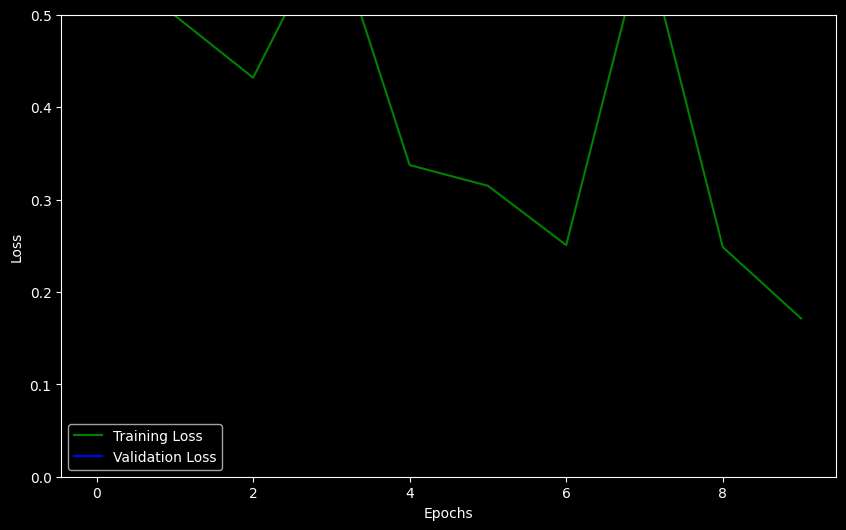

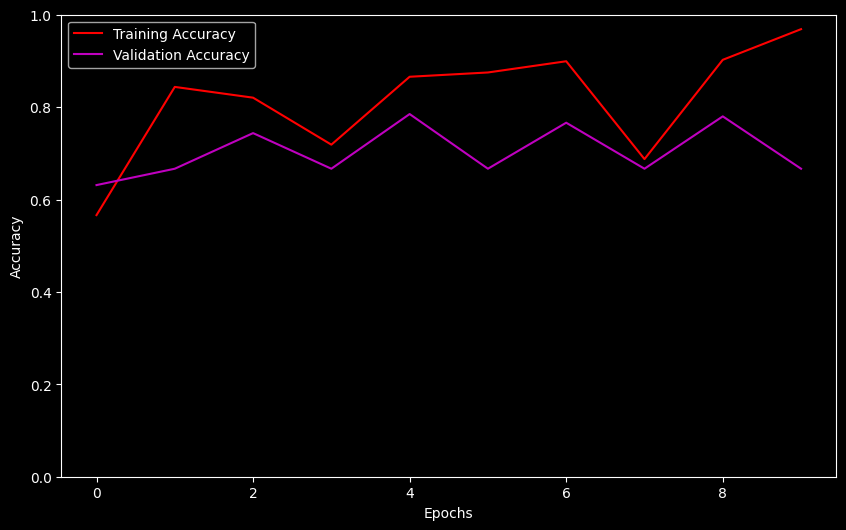

In [8]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plot_results(
    [train_loss, val_loss],
    ylabel='Loss',
    ylim=[0.0, 0.5],
    metric_names=['Training Loss', 'Validation Loss'],
    colors=['g', 'b']
)

plot_results(
    [train_acc, val_acc],
    ylabel='Accuracy',
    ylim=[0.0, 1.0],
    metric_names=['Training Accuracy', 'Validation Accuracy'],
    colors=['r', 'm']
)

### Matriz de confusão

26/26 ━━━━━━━━━━━━━━━━━━━━ 10s 392ms/step


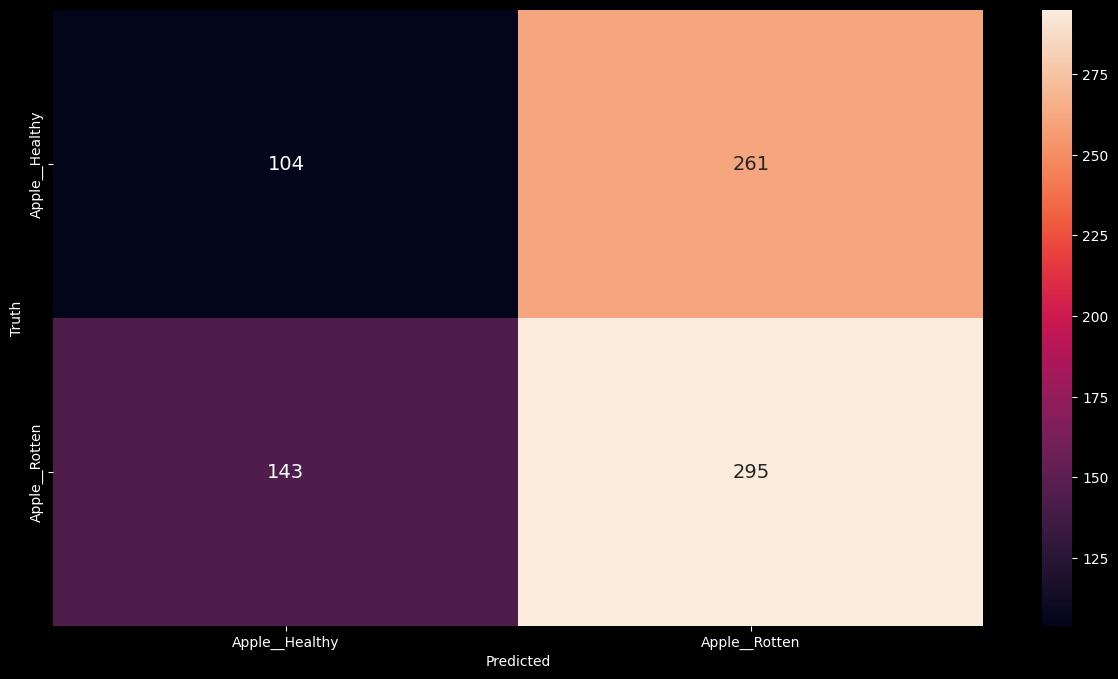

In [9]:
predictions = model.predict(test_generator)
predicted_labels = [np.argmax(i) for i in predictions]

# Ensure y_true is a 1-dimensional array of integer labels
y_test_integer_labels = y_true

cm = tf.math.confusion_matrix(
    labels=y_test_integer_labels,
    predictions=predicted_labels
)

# matriz de confusão
plt.figure(figsize=[15, 8])
sns.heatmap(cm, annot=True, fmt='d', annot_kws={'size': 14},
            xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

## Grid Search

In [5]:
# Função de construção do modelo com hiperparâmetros
def build_model(hp):
    model = models.Sequential()

    model.add(layers.Conv2D(
        filters=hp.Choice('conv_1_filters', values=[32, 64, 128]),
        kernel_size=(3, 3),
        activation='relu',
        input_shape=(150, 150, 3)))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    model.add(layers.Conv2D(
        filters=hp.Choice('conv_2_filters', values=[64, 128, 256]),
        kernel_size=(3, 3),
        activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    model.add(layers.Conv2D(
        filters=hp.Choice('conv_3_filters', values=[128, 256, 512]),
        kernel_size=(3, 3),
        activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    model.add(layers.Flatten())
    model.add(layers.Dense(
        units=hp.Choice('dense_units', values=[256, 512, 1024]),
        activation='relu'))
    model.add(layers.Dropout(rate=hp.Choice(
        'dropout_rate', values=[0.3, 0.5, 0.7])))

    # Saída para classificação binária
    model.add(layers.Dense(1, activation='sigmoid'))

    model.compile(optimizer=optimizers.Adam(
        learning_rate=hp.Choice('learning_rate',
                                values=[1e-2, 1e-3, 1e-4])),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model


# Configurando o Grid Search com o KerasTuner
tuner = kt.GridSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,  # Número de combinações de hiperparâmetros
    executions_per_trial=3,  # Número de execuções para cada combinação
    directory='my_dir',
    project_name='fruits_cnn_grid_search'
)

# Realizando a busca
tuner.search(train_generator,
             epochs=10,
             validation_data=validation_generator)

# Recuperando os melhores hiperparâmetros encontrados
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

# Exibindo os melhores hiperparâmetros
print(f"Melhor número de filtros na primeira camada: {
      best_hyperparameters.get('conv_1_filters')}")
print(f"Melhor número de filtros na segunda camada: {
      best_hyperparameters.get('conv_2_filters')}")
print(f"Melhor número de filtros na terceira camada: {
      best_hyperparameters.get('conv_3_filters')}")
print(f"Melhor número de unidades na camada densa: {
      best_hyperparameters.get('dense_units')}")
print(f"Melhor taxa de dropout: {best_hyperparameters.get('dropout_rate')}")
print(f"Melhor taxa de aprendizado: {
      best_hyperparameters.get('learning_rate')}")

Trial 10 Complete [00h 27m 30s]
val_accuracy: 0.5832295616467794

Best val_accuracy So Far: 0.8048983017603556
Total elapsed time: 04h 18m 42s
Melhor número de filtros na primeira camada: 32
Melhor número de filtros na segunda camada: 64
Melhor número de filtros na terceira camada: 128
Melhor número de unidades na camada densa: 256
Melhor taxa de dropout: 0.3
Melhor taxa de aprendizado: 0.001


### Melhor modelo

In [37]:
best_model = tuner.hypermodel.build(best_hyperparameters)

# Treinando o modelo com os melhores hiperparâmetros
history = best_model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

# Avaliando no conjunto de teste
y_pred = best_model.predict(test_generator)
y_pred = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

# Relatório de classificação
print('Classification Report')
print(classification_report(y_true, y_pred,
      target_names=test_generator.class_indices.keys()))


/Users/guiga/Documents/Projects/Vscode/CESAR School/8º Período/IA/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 59s 396ms/step - accuracy: 0.6835 - loss: 0.6660 - val_accuracy: 0.7472 - val_loss: 0.6545
Epoch 2/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 53s 361ms/step - accuracy: 0.8457 - loss: 0.3651 - val_accuracy: 0.7572 - val_loss: 0.5932
Epoch 3/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 53s 361ms/step - accuracy: 0.8779 - loss: 0.3005 - val_accuracy: 0.7435 - val_loss: 0.9064
Epoch 4/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 57s 382ms/step - accuracy: 0.8974 - loss: 0.2621 - val_accuracy: 0.7634 - val_loss: 0.7450
Epoch 5/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 56s 378ms/step - accuracy: 0.9107 - loss: 0.2309 - val_accuracy: 0.7771 - val_loss: 0.7382
Epoch 6/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 50s 341ms/step - accuracy: 0.9203 - loss: 0.2010 - val_accuracy: 0.8007 - val_loss: 0.4637
Epoch 7/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 50s 343ms/step - accuracy: 0.9299 - loss: 0.1820 - val_accuracy: 0.8070 - val_loss: 0.5435
Epoch 8/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 52s 351ms/step - accuracy: 0.9364 - loss: 0

/Users/guiga/Documents/Projects/Vscode/CESAR School/8º Período/IA/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/guiga/Documents/Projects/Vscode/CESAR School/8º Período/IA/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/guiga/Documents/Projects/Vscode/CESAR School/8º Período/IA/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted s

168/168 ━━━━━━━━━━━━━━━━━━━━ 32s 189ms/step
Classification Report
               precision    recall  f1-score   support

Apple_Healthy       0.47      0.44      0.46      2438
 Apple_Rotten       0.56      0.59      0.57      2925

     accuracy                           0.52      5363
    macro avg       0.51      0.51      0.51      5363
 weighted avg       0.52      0.52      0.52      5363

Confusion Matrix
[[1080 1358]
 [1213 1712]]


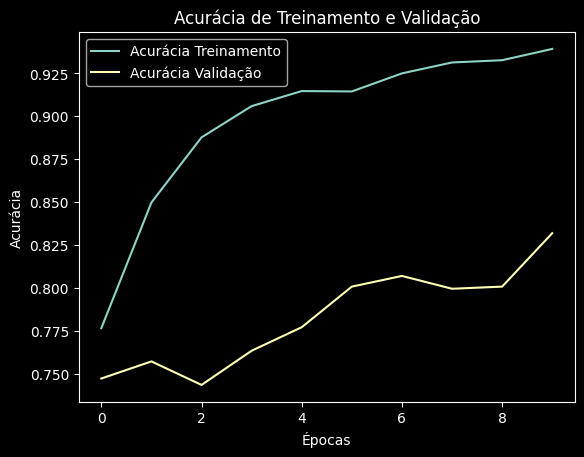

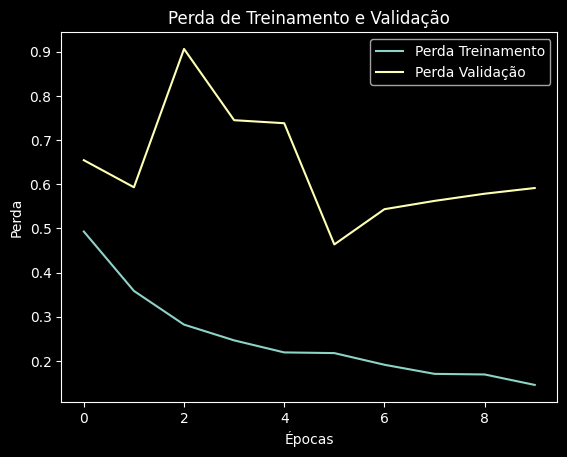

In [40]:
# Avaliação no conjunto de teste
Y_pred = best_model.predict(test_generator)
y_pred = (Y_pred > 0.5).astype(int)  # Convertendo probabilidades para classe binária
y_true = test_generator.classes

# Relatório de classificação
print('Classification Report')
print(classification_report(y_true, y_pred, target_names=['Apple_Healthy', 'Apple_Rotten']))

# Matriz de Confusão
print('Confusion Matrix')
print(confusion_matrix(y_true, y_pred))



# Acurácia
plt.plot(history.history['accuracy'], label='Acurácia Treinamento')
plt.plot(history.history['val_accuracy'], label='Acurácia Validação')
plt.title('Acurácia de Treinamento e Validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()
plt.show()

# Perda
plt.plot(history.history['loss'], label='Perda Treinamento')
plt.plot(history.history['val_loss'], label='Perda Validação')
plt.title('Perda de Treinamento e Validação')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()
plt.show()


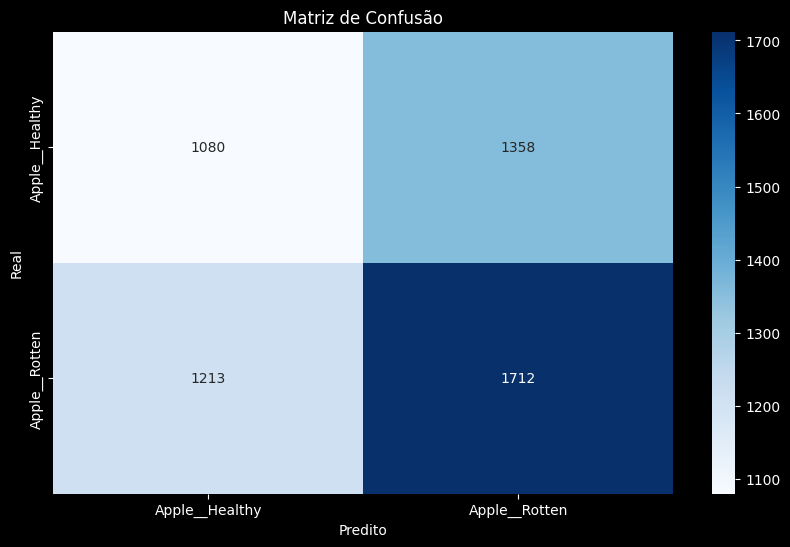

In [41]:
# Matriz de confusão
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')

plt.show()

## Pre-trained models

In [14]:
from tensorflow.keras.applications import VGG16, ResNet50, InceptionV3  # type: ignore

### VGG16

In [22]:
data_dir = 'data/imgs'

# Configuração do ImageDataGenerator com Data Augmentation para treinamento
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   validation_split=0.15)  # 15% para validação

test_datagen = ImageDataGenerator(rescale=1./255)  # Somente reescala para o teste

# Geradores de treino, validação e teste
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',  # Classes binárias
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

test_generator = test_datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset=None
)


Found 4560 images belonging to 2 classes.
Found 803 images belonging to 2 classes.
Found 5363 images belonging to 2 classes.


In [33]:
def create_vgg_model():
    # Carregando o modelo VGG16 pré-treinado, excluindo a camada densa final
    base_model = VGG16(weights='imagenet', include_top=False,
                       input_shape=(150, 150, 3))

    # Congelando as camadas do modelo VGG16
    for layer in base_model.layers:
        layer.trainable = False

    # Adicionando camadas densas ao topo para classificação binária
    model = models.Sequential()
    model.add(base_model)
    model.add(layers.Flatten())
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dropout(0.5))
    # Ativação sigmoid para classificação binária
    model.add(layers.Dense(1, activation='sigmoid'))

    # Compilando o modelo
    model.compile(optimizer=optimizers.Adam(learning_rate=1e-3),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model


# Criando o modelo
model = create_vgg_model()

# Treinamento do modelo
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // 32
)

Epoch 1/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 237s 2s/step - accuracy: 0.7412 - loss: 0.6605 - val_accuracy: 0.7663 - val_loss: 0.4819
Epoch 2/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9375 - loss: 0.1636 - val_accuracy: 0.3333 - val_loss: 1.3472
Epoch 3/10


/opt/homebrew/Cellar/python@3.12/3.12.5/Frameworks/Python.framework/Versions/3.12/lib/python3.12/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


142/142 ━━━━━━━━━━━━━━━━━━━━ 235s 2s/step - accuracy: 0.9055 - loss: 0.2326 - val_accuracy: 0.7487 - val_loss: 0.5987
Epoch 4/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 997us/step - accuracy: 0.8750 - loss: 0.2572 - val_accuracy: 0.6667 - val_loss: 0.5240
Epoch 5/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 235s 2s/step - accuracy: 0.9215 - loss: 0.1862 - val_accuracy: 0.8050 - val_loss: 0.4458
Epoch 6/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9375 - loss: 0.1132 - val_accuracy: 0.6667 - val_loss: 0.5652
Epoch 7/10


2024-10-06 20:05:05.860514: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


142/142 ━━━━━━━━━━━━━━━━━━━━ 244s 2s/step - accuracy: 0.9296 - loss: 0.1745 - val_accuracy: 0.7837 - val_loss: 0.4925
Epoch 8/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9062 - loss: 0.2688 - val_accuracy: 0.6667 - val_loss: 0.4509
Epoch 9/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 253s 2s/step - accuracy: 0.9329 - loss: 0.1551 - val_accuracy: 0.7812 - val_loss: 0.4891
Epoch 10/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9375 - loss: 0.1433 - val_accuracy: 0.6667 - val_loss: 0.6555


168/168 ━━━━━━━━━━━━━━━━━━━━ 235s 1s/step
Classification Report
               precision    recall  f1-score   support

Apple_Healthy       0.45      0.42      0.44      2438
 Apple_Rotten       0.55      0.58      0.56      2925

     accuracy                           0.51      5363
    macro avg       0.50      0.50      0.50      5363
 weighted avg       0.50      0.51      0.50      5363

Confusion Matrix
[[1028 1410]
 [1234 1691]]


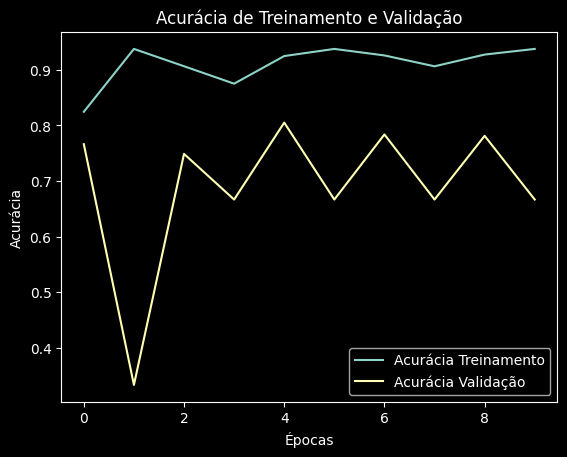

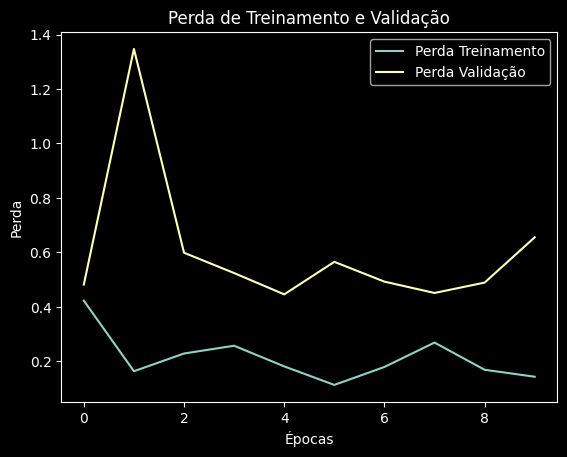

In [36]:
# Avaliação no conjunto de teste
Y_pred = model.predict(test_generator)
y_pred = (Y_pred > 0.5).astype(int)  # Convertendo probabilidades para classe binária
y_true = test_generator.classes

# Relatório de classificação
print('Classification Report')
print(classification_report(y_true, y_pred, target_names=['Apple_Healthy', 'Apple_Rotten']))

# Matriz de Confusão
print('Confusion Matrix')
print(confusion_matrix(y_true, y_pred))



# Acurácia
plt.plot(history.history['accuracy'], label='Acurácia Treinamento')
plt.plot(history.history['val_accuracy'], label='Acurácia Validação')
plt.title('Acurácia de Treinamento e Validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()
plt.show()

# Perda
plt.plot(history.history['loss'], label='Perda Treinamento')
plt.plot(history.history['val_loss'], label='Perda Validação')
plt.title('Perda de Treinamento e Validação')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()
plt.show()
